In [2]:
import numpy as np
import pandas as pd
import mne
from mne.channels import make_standard_montage
import numpy as np
import copy
import matplotlib.pyplot as plt
import mne
from autoreject import get_rejection_threshold, AutoReject
from mne.preprocessing import ICA, corrmap
from numpy import genfromtxt

#my_data = genfromtxt('Hyper39_Dual3.txt', delimiter=',',dtype=None)

In [3]:
dat_1 = pd.read_csv('Hyper_scanning.csv',';')
dat_2 = pd.read_csv('Hyper_scanning_2.csv',';')

C:\Temp\ipykernel_6668\3721675993.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dat_1 = pd.read_csv('Hyper_scanning.csv',';')
C:\Temp\ipykernel_6668\3721675993.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dat_2 = pd.read_csv('Hyper_scanning_2.csv',';')


In [4]:
dat_1

,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,0.05,0.03,-0.04,0.05,-0.06,0.05,-0.05,0.03,-0.08,-0.10,-0.30,-0.20,0.03,-0.12,-0.18
1,0.19,0.11,-0.32,0.20,-0.43,0.22,-0.37,0.14,-0.55,-0.67,-1.88,-1.22,0.17,-0.81,-1.10
2,0.40,0.15,-1.09,0.41,-1.42,0.48,-1.27,0.36,-1.83,-2.21,-5.88,-3.78,0.49,-2.64,-3.39
3,0.61,0.09,-2.50,0.64,-3.13,0.83,-2.92,0.68,-4.16,-5.00,-12.81,-8.18,1.05,-5.88,-7.36
4,0.89,-0.06,-4.62,0.96,-5.59,1.26,-5.41,1.13,-7.61,-9.18,-23.08,-14.62,1.91,-10.74,-13.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762259,-0.37,0.33,-4.01,-6.04,-16.89,2.64,-0.29,-1.83,5.29,6.77,7.09,1.86,4.55,6.53,8.84
762260,-0.95,0.72,-4.61,-5.42,-9.65,1.97,-0.17,-2.21,6.26,6.36,6.33,0.72,3.69,5.94,6.56
762261,-1.47,1.18,-3.73,-3.03,3.89,1.36,0.36,-0.29,6.85,6.23,6.53,1.17,3.97,5.54,5.35
762262,-0.60,2.20,-1.24,0.75,14.73,2.09,1.87,3.64,7.72,7.09,8.10,3.51,5.82,6.20,6.26


In [5]:
dat_1 = dat_1.T
dat_2 = dat_2.T

In [6]:
dat_2

,0,1,2,3,4,5,6,7,8,9,...,762254,762255,762256,762257,762258,762259,762260,762261,762262,762263
Column2,-0.01,-0.04,-0.12,-0.24,-0.38,-0.53,-0.62,-0.63,-0.56,-0.46,...,4.11,5.74,6.53,6.94,7.46,8.31,9.45,10.09,9.42,7.94
Column3,0.21,1.27,3.92,8.51,15.33,23.99,32.06,37.04,38.49,36.51,...,-3.22,-0.64,2.65,5.36,7.26,8.43,8.96,8.23,5.86,3.27
Column4,-0.13,-0.78,-2.36,-5.09,-9.10,-14.13,-18.75,-21.52,-22.22,-21.01,...,3.91,4.96,5.74,6.63,8.04,9.80,11.49,12.41,12.09,11.06
Column5,-0.07,-0.44,-1.32,-2.85,-5.07,-7.79,-10.25,-11.70,-11.98,-11.21,...,5.44,7.73,9.26,10.31,11.44,13.00,14.73,15.51,14.60,12.89
Column6,0.05,0.30,0.94,2.07,3.76,5.93,8.02,9.38,9.84,9.45,...,5.72,7.61,9.03,10.25,11.42,12.57,13.70,13.74,11.75,9.05
Column7,-0.08,-0.48,-1.49,-3.26,-5.86,-9.11,-12.15,-13.98,-14.41,-13.62,...,0.04,0.93,1.47,1.69,1.91,2.37,2.95,3.43,3.65,3.45
Column8,-0.10,-0.68,-2.19,-4.84,-8.72,-13.61,-18.16,-20.85,-21.43,-20.17,...,0.42,2.14,3.94,5.36,6.48,7.56,9.04,10.33,10.22,9.19
Column9,-0.21,-1.30,-3.99,-8.62,-15.43,-23.93,-31.73,-36.33,-37.37,-35.17,...,6.38,4.80,3.20,2.51,2.93,4.12,5.53,6.13,4.93,3.16
Column10,-0.03,-0.21,-0.67,-1.51,-2.78,-4.39,-5.92,-6.88,-7.12,-6.69,...,-4.40,-6.62,-6.24,-4.30,-1.45,1.07,2.01,1.11,-0.79,-1.87
Column11,-0.00,0.06,0.33,0.84,1.65,2.77,3.96,4.79,5.16,5.08,...,-4.44,-3.84,-1.88,0.17,1.86,3.19,4.16,4.44,3.80,3.30


In [7]:
dat_1 = dat_1.drop([i for i in range(1251)], axis=1)
dat_2 = dat_2.drop([i for i in range(1251)], axis=1)
dat_2

,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,...,762254,762255,762256,762257,762258,762259,762260,762261,762262,762263
Column2,-2.40,-2.68,-1.54,-0.36,-0.76,-2.44,-3.53,-2.96,-1.33,0.01,...,4.11,5.74,6.53,6.94,7.46,8.31,9.45,10.09,9.42,7.94
Column3,-1.35,0.22,2.43,3.91,4.29,3.26,2.00,1.92,2.31,1.91,...,-3.22,-0.64,2.65,5.36,7.26,8.43,8.96,8.23,5.86,3.27
Column4,-16.50,-17.70,-15.96,-14.20,-15.28,-18.25,-19.28,-16.88,-13.28,-11.37,...,3.91,4.96,5.74,6.63,8.04,9.80,11.49,12.41,12.09,11.06
Column5,-8.68,-9.19,-7.63,-6.02,-6.71,-9.40,-11.01,-9.67,-6.78,-4.62,...,5.44,7.73,9.26,10.31,11.44,13.00,14.73,15.51,14.60,12.89
Column6,-5.58,-6.02,-3.68,-0.94,-0.93,-3.58,-5.41,-4.29,-1.87,-0.42,...,5.72,7.61,9.03,10.25,11.42,12.57,13.70,13.74,11.75,9.05
Column7,-2.53,-2.45,-2.78,-3.96,-5.36,-6.29,-6.08,-4.69,-3.40,-3.25,...,0.04,0.93,1.47,1.69,1.91,2.37,2.95,3.43,3.65,3.45
Column8,-14.24,-13.92,-10.74,-6.59,-4.68,-6.22,-8.02,-7.17,-4.36,-2.21,...,0.42,2.14,3.94,5.36,6.48,7.56,9.04,10.33,10.22,9.19
Column9,-18.13,-19.12,-15.48,-10.30,-8.55,-11.06,-12.88,-10.75,-7.50,-5.93,...,6.38,4.80,3.20,2.51,2.93,4.12,5.53,6.13,4.93,3.16
Column10,-13.76,-12.60,-8.02,-1.27,3.91,4.46,1.95,-0.44,-1.18,-0.92,...,-4.40,-6.62,-6.24,-4.30,-1.45,1.07,2.01,1.11,-0.79,-1.87
Column11,-20.66,-20.10,-16.35,-11.06,-7.35,-7.05,-7.63,-6.45,-4.15,-2.75,...,-4.44,-3.84,-1.88,0.17,1.86,3.19,4.16,4.44,3.80,3.30


In [8]:
dat_2.loc['Column2'][dat_2.loc['Column2'] == dat_2.loc['Column2'].max()]

546513    75.08
Name: Column2, dtype: float64

In [9]:
dat_2.loc['Column2']

1251      -2.40
1252      -2.68
1253      -1.54
1254      -0.36
1255      -0.76
          ...  
762259     8.31
762260     9.45
762261    10.09
762262     9.42
762263     7.94
Name: Column2, Length: 761013, dtype: float64

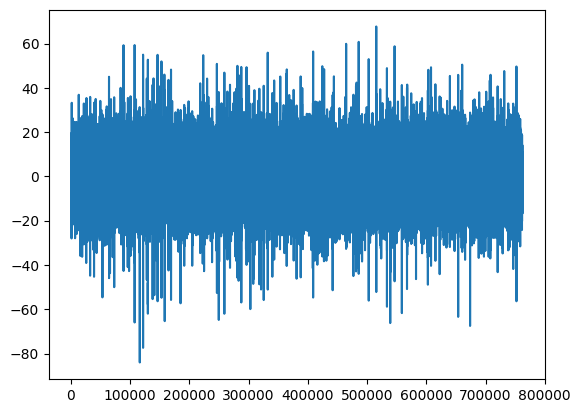

In [10]:
lines = plt.plot(dat_2.loc['Column12'].index,dat_2.loc['Column12'])

In [11]:
dat_2

,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,...,762254,762255,762256,762257,762258,762259,762260,762261,762262,762263
Column2,-2.40,-2.68,-1.54,-0.36,-0.76,-2.44,-3.53,-2.96,-1.33,0.01,...,4.11,5.74,6.53,6.94,7.46,8.31,9.45,10.09,9.42,7.94
Column3,-1.35,0.22,2.43,3.91,4.29,3.26,2.00,1.92,2.31,1.91,...,-3.22,-0.64,2.65,5.36,7.26,8.43,8.96,8.23,5.86,3.27
Column4,-16.50,-17.70,-15.96,-14.20,-15.28,-18.25,-19.28,-16.88,-13.28,-11.37,...,3.91,4.96,5.74,6.63,8.04,9.80,11.49,12.41,12.09,11.06
Column5,-8.68,-9.19,-7.63,-6.02,-6.71,-9.40,-11.01,-9.67,-6.78,-4.62,...,5.44,7.73,9.26,10.31,11.44,13.00,14.73,15.51,14.60,12.89
Column6,-5.58,-6.02,-3.68,-0.94,-0.93,-3.58,-5.41,-4.29,-1.87,-0.42,...,5.72,7.61,9.03,10.25,11.42,12.57,13.70,13.74,11.75,9.05
Column7,-2.53,-2.45,-2.78,-3.96,-5.36,-6.29,-6.08,-4.69,-3.40,-3.25,...,0.04,0.93,1.47,1.69,1.91,2.37,2.95,3.43,3.65,3.45
Column8,-14.24,-13.92,-10.74,-6.59,-4.68,-6.22,-8.02,-7.17,-4.36,-2.21,...,0.42,2.14,3.94,5.36,6.48,7.56,9.04,10.33,10.22,9.19
Column9,-18.13,-19.12,-15.48,-10.30,-8.55,-11.06,-12.88,-10.75,-7.50,-5.93,...,6.38,4.80,3.20,2.51,2.93,4.12,5.53,6.13,4.93,3.16
Column10,-13.76,-12.60,-8.02,-1.27,3.91,4.46,1.95,-0.44,-1.18,-0.92,...,-4.40,-6.62,-6.24,-4.30,-1.45,1.07,2.01,1.11,-0.79,-1.87
Column11,-20.66,-20.10,-16.35,-11.06,-7.35,-7.05,-7.63,-6.45,-4.15,-2.75,...,-4.44,-3.84,-1.88,0.17,1.86,3.19,4.16,4.44,3.80,3.30


In [12]:
sfreq = 250 #Hz
ch_names = ['Columns1','Columns2','Columns3','Columns4','Columns5','Columns6','Columns7',
            'Columns8','Columns9','Columns10','Columns11','Columns12','Columns13','Columns14',
            'Columns15']
ch_names = ['Fp1','Fp2','F3','Fz','F4','T7','C3',
            'Cz','C4','T8','P3','Pz','P4','O1','O2']
print(len(ch_names))
info = mne.create_info(ch_names, sfreq,ch_types='eeg')
mne_array_1 = mne.io.RawArray(dat_1, info)
mne_array_2 = mne.io.RawArray(dat_2, info)

15
Creating RawArray with float64 data, n_channels=15, n_times=761013
    Range : 0 ... 761012 =      0.000 ...  3044.048 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=761013
    Range : 0 ... 761012 =      0.000 ...  3044.048 secs
Ready.


In [13]:
mne_array_2

<RawArray | 15 x 761013 (3044.0 s), ~87.1 MB, data loaded>

Using matplotlib as 2D backend.


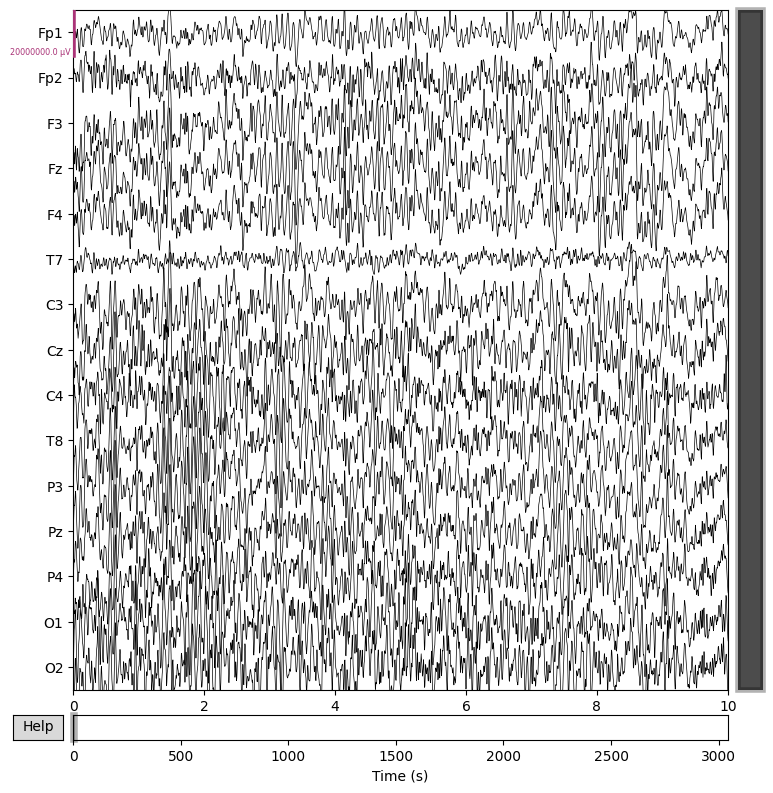

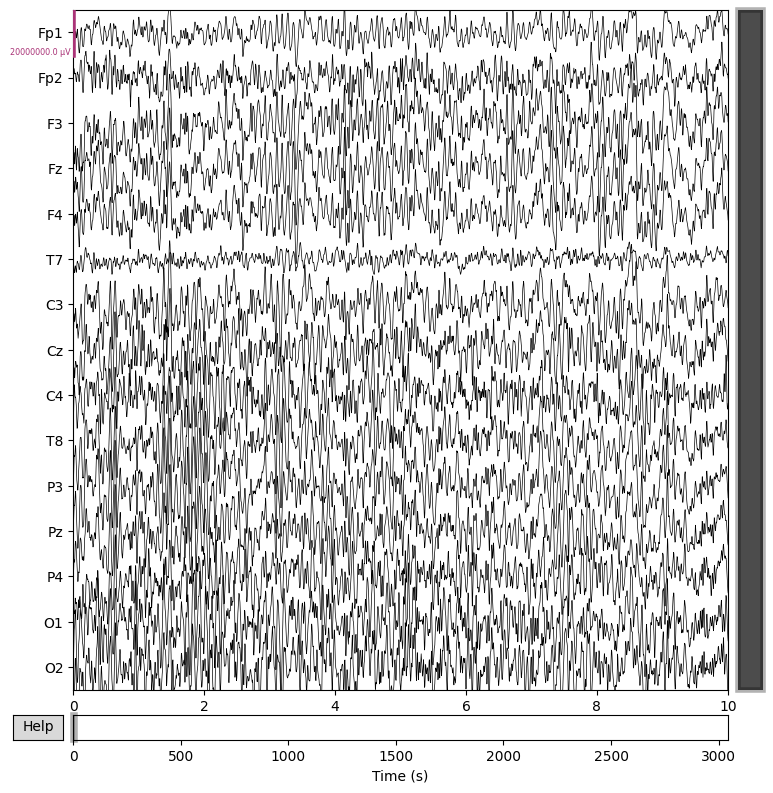

In [17]:
"""Viewing raw data"""
mne_array_2.plot(scalings=(10))

In [16]:
event_id = {'1': 1, '2': 2,'12': 12}

In [18]:
events_mne = mne.read_events('Metki1.txt')

C:\Temp\ipykernel_6668\966891271.py:1: RuntimeWarning: This filename (Metki1.txt) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  events_mne = mne.read_events('Metki1.txt')


In [19]:
events_mne

array([[  16,    0,    2],
       [  25,    0,    2],
       [  34,    0,    2],
       ...,
       [ 302,    0,    1],
       [3031,    0,    1],
       [3040,    0,    1]])

In [20]:
for i in range(len(events_mne)):
    events_mne[i][0]*=250
events_mne

array([[  4000,      0,      2],
       [  6250,      0,      2],
       [  8500,      0,      2],
       ...,
       [ 75500,      0,      1],
       [757750,      0,      1],
       [760000,      0,      1]])

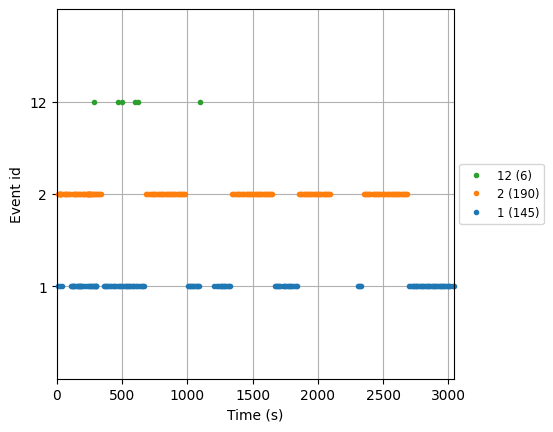

In [21]:
fig = mne.viz.plot_events(events_mne, sfreq=250, event_id=event_id)
fig.subplots_adjust(right=0.7)  # make room for legend

Using matplotlib as 2D backend.


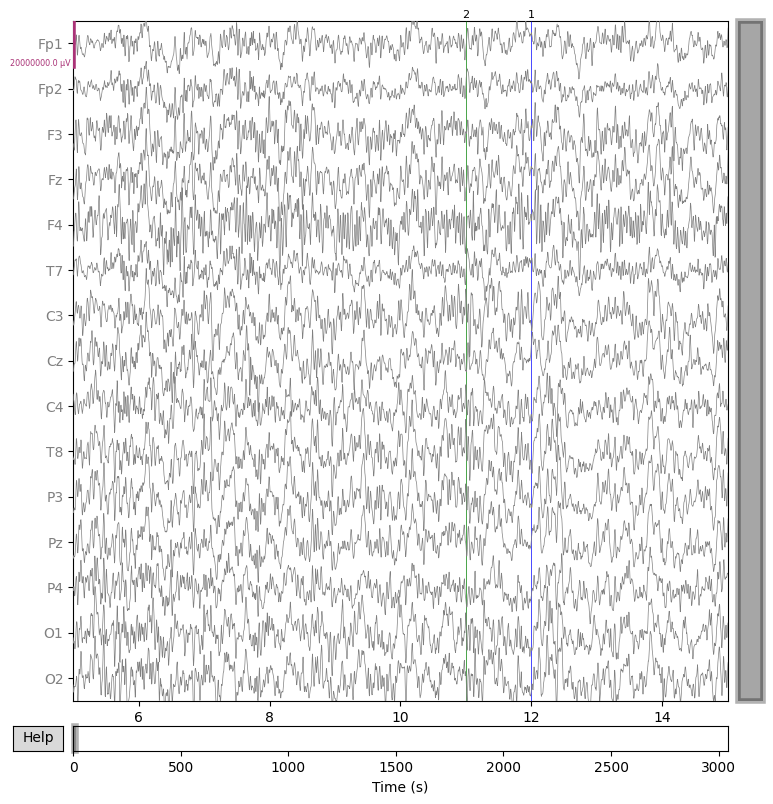

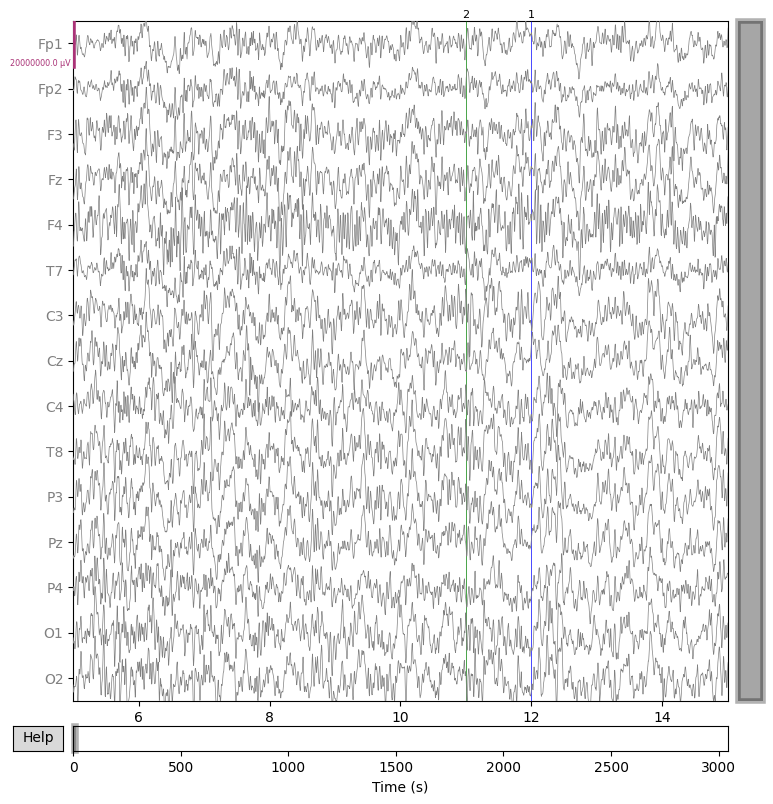

In [22]:
mne_array_1.plot(events=events_mne, start=5, duration=10, color='gray',
         event_color={1: 'blue', 2: 'g',12:'g'},scalings=(10))

In [24]:
# events['Latency'] = events['Latency'].apply(lambda x: int(x))
# events['Latency'].duplicated().sum()

In [23]:
montage = mne.channels.make_standard_montage('biosemi16')
mne_array_1.set_montage(montage)
mne_array_2.set_montage(montage)

<RawArray | 15 x 761013 (3044.0 s), ~87.1 MB, data loaded>

In [24]:
epoch_1 = mne.Epochs(mne_array_1, events_mne, event_id,
                    baseline=(None, 0), preload=True,event_repeated='drop')
epoch_2 = mne.Epochs(mne_array_2, events_mne, event_id,
                    baseline=(None, 0), preload=True,event_repeated='drop')

Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
329 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 329 events and 176 original time points ...
0 bad epochs dropped
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
329 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 329 events and 176 original time points ...
0 bad epochs dropped


In [25]:
epoch_1

Number of events,329
Events,1: 14112: 62: 182
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [26]:
import statsmodels
print(statsmodels.__version__)

0.13.5


In [27]:
import hypyp
from hypyp import prep 

Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 103.60000000000001}
Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:178: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica = ICA(n_components=n_components,
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:178: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica = ICA(n_components=n_components,


Fitting ICA took 14.5s.
0 bad epochs dropped
Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:178: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.1) and smallest (1.7e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica = ICA(n_components=n_components,
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:186: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  icas.append(ica.fit(epoch_all_ch))
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:186: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  icas.append(ica.fit(epoch_

Fitting ICA took 14.7s.


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:186: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.1) and smallest (1.7e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  icas.append(ica.fit(epoch_all_ch))


Estimating rejection dictionary for eeg
The rejection dictionary is {'eeg': 151.45}
Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:178: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica = ICA(n_components=n_components,
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:178: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica = ICA(n_components=n_components,


Fitting ICA took 14.2s.
0 bad epochs dropped
Fitting ICA to data using 15 channels (please be patient, this may take a while)
Selecting by number: 15 components
Computing Extended Infomax ICA


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:178: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.1) and smallest (1.5e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica = ICA(n_components=n_components,
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:186: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  icas.append(ica.fit(epoch_all_ch))
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:186: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  icas.append(ica.fit(epoch_

Fitting ICA took 13.9s.


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\prep.py:186: RuntimeWarning: Using n_components=15 (resulting in n_components_=15) may lead to an unstable mixing matrix estimation because the ratio between the largest (9.1) and smallest (1.5e-07) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  icas.append(ica.fit(epoch_all_ch))


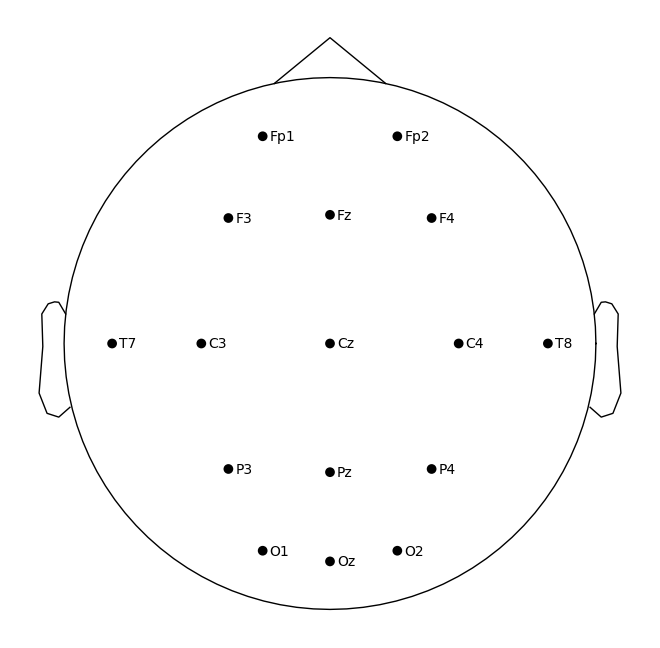

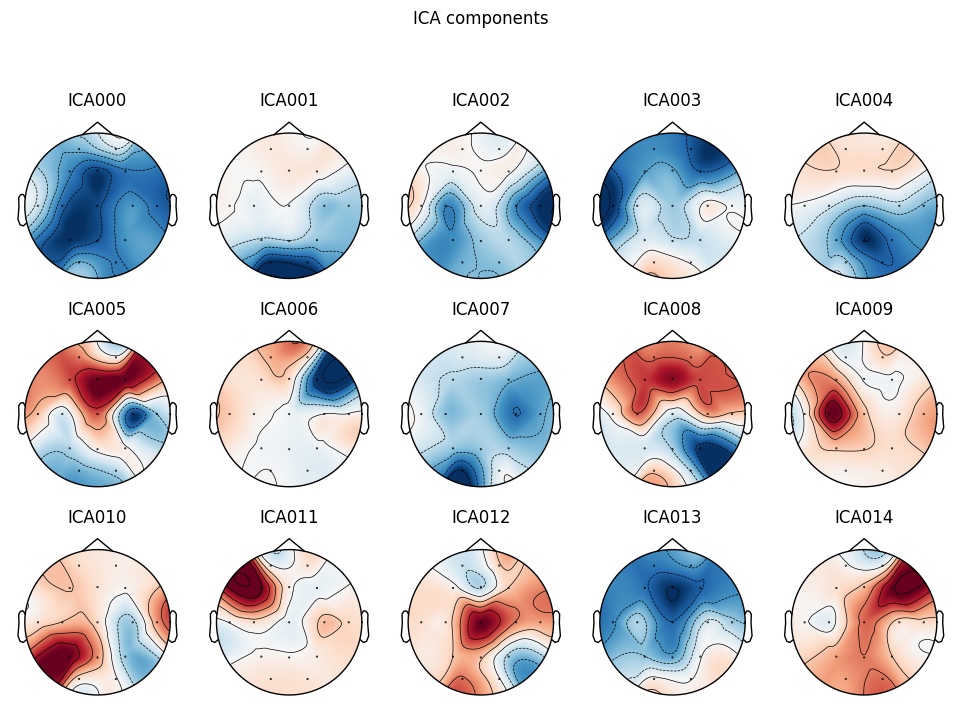

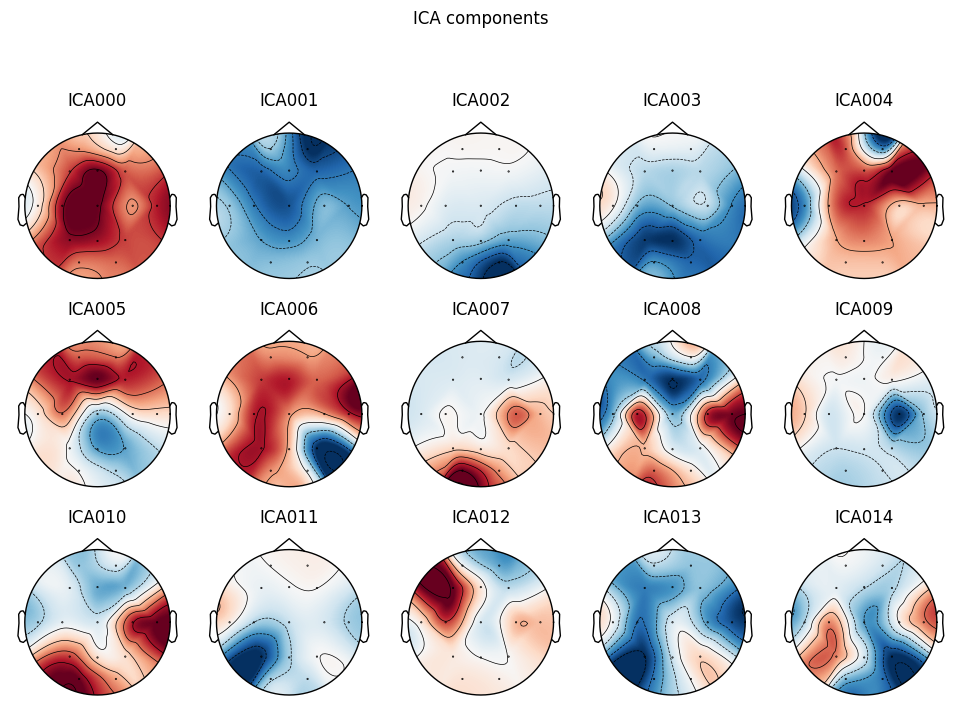

Which participant ICA do you want to use as a template for artifact rejection? Index begins at zero. (If you do not want to apply ICA on your data, do not enter nothing and press enter.)
Which IC do you want to use as a template? Index begins at zero. (If you did not choosea participant number at first question,then do not enter nothing and press enter againto not apply ICA on your data)
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/15 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/15 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/15 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/15 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/329 [00:00<?,       ?it/s]

C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\mne\bem.py:1119: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1
Dropped 13 epochs: 56, 59, 60, 75, 92, 98, 141, 160, 165, 176, 236, 267, 312


  0%|          | Repairing epochs : 0/316 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
Dropped 13 epochs: 56, 59, 60, 75, 92, 98, 141, 160, 165, 176, 236, 267, 312


  0%|          | Repairing epochs : 0/316 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
3.951367781155015 percent of bad epochs


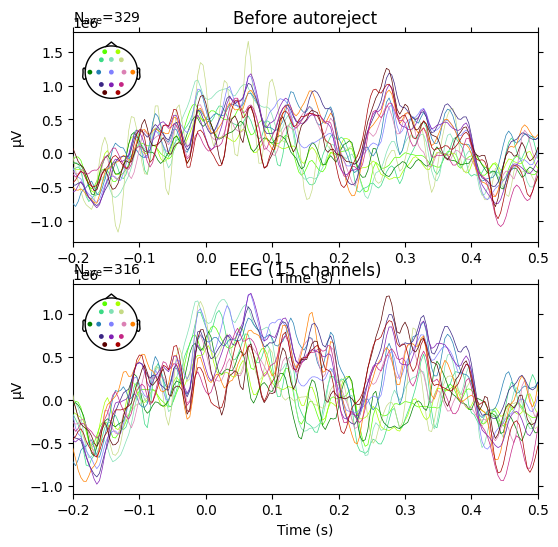

<Figure size 640x480 with 0 Axes>

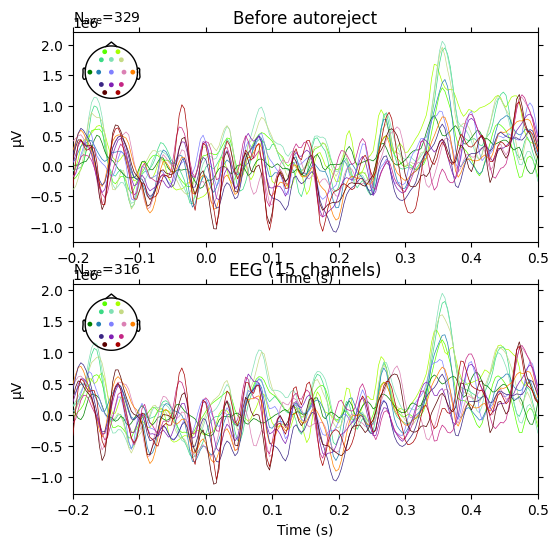

<Figure size 640x480 with 0 Axes>

In [28]:
# def epochs():
#     #epoch_1 = mne.io.read_raw_fieldtrip('d:/user/Desktop/Hyperscanning_py/Hyper39Dual3.mat',info=None)
#     epoch_1 = mne.read_epochs(r'd:\user\Desktop\Hyperscanning_py\Hyper39Dual3.mat')
#     #epoch_2 = mne.read_epochs_fieldtrip(r'd:\user\Desktop\Hyperscanning_py\Hyper40Dual3')
#     return epoch_1,epoch_2
# epoch_1,epoch_2 = epochs()
def high_pass_filtering(raw1,raw2):
    filt_raws = prep.filt(raws=[raw1,raw2])
    return filt_raws
def computing_ICA(epochs_1,epochs_2):
    icas = prep.ICA_fit(epochs=[epochs_1,epochs_2],n_components = 15,method = 'infomax',
                        fit_params=dict(extended=True),random_state = 42)
    montage.plot()
    cleaned_epochs_ICA = prep.ICA_choice_comp(icas,epochs=[epochs_1,epochs_2])
    cleaned_epochs_AR = prep.AR_local(cleaned_epochs_ICA,verbose=True)
    return cleaned_epochs_ICA,cleaned_epochs_AR
cleaned_epochs_ICA,cleaned_epochs_AR = computing_ICA(epoch_1,epoch_2)
def merge(epochs1,epochs2):
    hyper_epo = merge(epochs_S1=epochs1,epochs_S2 = epochs2)
    epochs1,epochs2 = split(hyper_epo)

In [30]:
preproc_S1 = cleaned_epochs_AR[0][0]
preproc_S2 = cleaned_epochs_AR[0][1]

In [31]:
mne_array_1.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, Fz, F4, T7, C3, Cz, C4, T8, P3, Pz, P4, O1, O2
 chs: 15 EEG
 custom_ref_applied: False
 dig: 18 items (3 Cardinal, 15 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 15
 projs: []
 sfreq: 250.0 Hz
>

In [32]:
cleaned_epochs_no_ICA = [epoch_1, epoch_2]

In [33]:
cleaned_epochs_AR

([<Epochs |  316 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~6.4 MB, data loaded,
   '1': 134
   '2': 177
   '12': 5>,
  <Epochs |  316 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~6.4 MB, data loaded,
   '1': 134
   '2': 177
   '12': 5>],
 {'strategy': 'union',
  'threshold': 50.0,
  'S1': 3.343465045592705,
  'S2': 0.60790273556231,
  'dyad': 3.951367781155015})

In [34]:
from hypyp import analyses

In [35]:
psd1 = analyses.pow(preproc_S1, fmin=7.5, fmax=11,
                    n_fft=1000, n_per_seg=1000, epochs_average=True)
psd2 = analyses.pow(preproc_S2, fmin=7.5, fmax=11,
                    n_fft=1000, n_per_seg=1000, epochs_average=True)
data_psd = np.array([psd1.psd, psd2.psd])

Effective window size : 4.000 (s)
Effective window size : 4.000 (s)


In [36]:
data_inter = np.array([preproc_S1, preproc_S2])
# no_ICA_data_inter = np.array([no_ICA_preproc_S1, no_ICA_preproc_S2])

In [37]:
freq_bands = {'alpha':[7.5,11.5],'beta':[12,20]}
complex_signal = analyses.compute_freq_bands(data_inter,sampling_rate = 250, freq_bands=freq_bands)
result = analyses.compute_sync(complex_signal,mode='ccorr')

C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\analyses.py:695: RuntimeWarning: filter_length (413) is longer than the signal (176), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = np.array([mne.filter.filter_data(data[participant],
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\analyses.py:695: RuntimeWarning: filter_length (413) is longer than the signal (176), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = np.array([mne.filter.filter_data(data[participant],
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\analyses.py:695: RuntimeWarning: filter_length (275) is longer than the signal (176), distortion is likely. Reduce filter length or filter a longer signal.
  filtered = np.array([mne.filter.filter_data(data[participant],
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\analyses.py:695: RuntimeWarning: 

In [38]:
from scipy.stats import circmean

In [39]:
n_epoch, n_ch, n_freq, n_samp = complex_signal.shape[1], complex_signal.shape[2], \
                                    complex_signal.shape[3], complex_signal.shape[4]
complex_signal = complex_signal.transpose((1, 3, 0, 2, 4)).reshape(n_epoch, n_freq, 2 * n_ch, n_samp)
angle = np.angle(complex_signal)
mu_angle = circmean(angle, axis=3).reshape(n_epoch, n_freq, 2 * n_ch, 1)

In [40]:
angles = np.deg2rad(np.array([20, 30, 330]))
angles
circmean = circmean(angles)

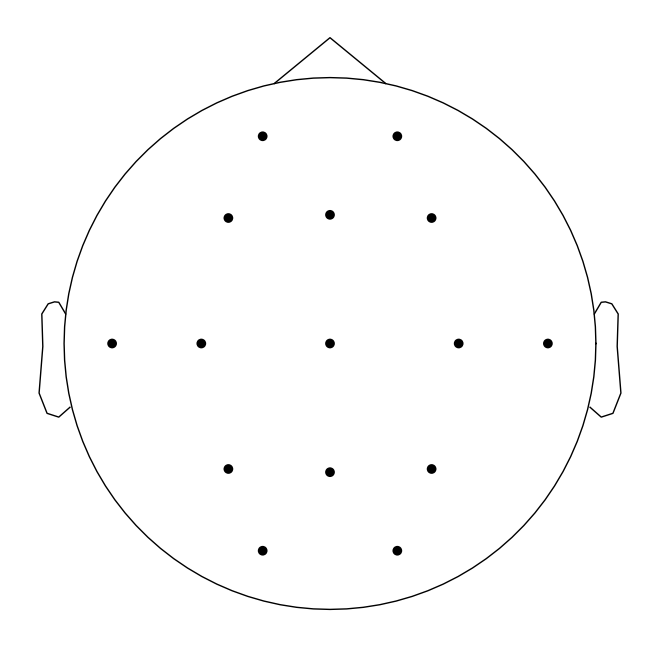

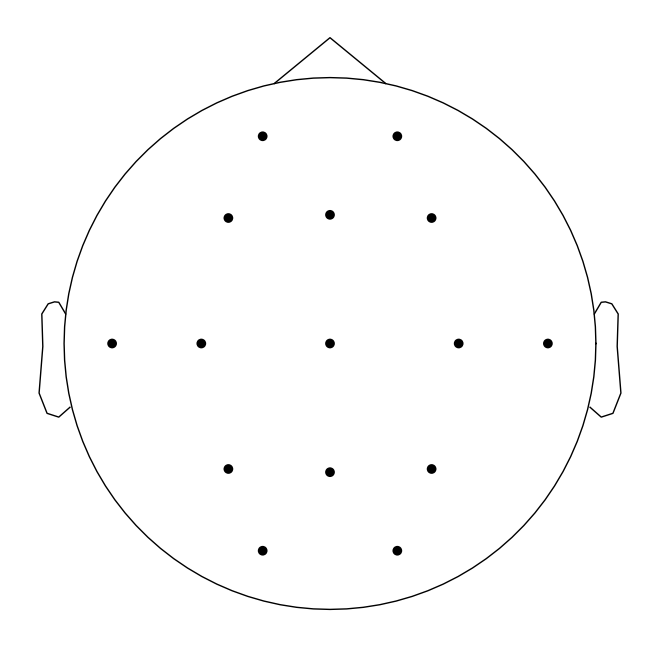

In [41]:
epoch_1.plot_sensors()

In [44]:
n_ch = len(epoch_1.info['ch_names'])
alpha, betta = result[:, 0:n_ch, n_ch:2*n_ch]

In [45]:
values = alpha
C = (values - np.mean(values[:])) / np.std(values[:])

In [270]:
alpha

array([[ 0.02744379,  0.01168567,  0.04571357,  0.04650302,  0.02145197,
         0.01698142,  0.02230767,  0.02267016,  0.0264262 ,  0.03334585,
         0.05276539,  0.05819514,  0.06991425,  0.03067529,  0.0448329 ],
       [ 0.04317113,  0.0436116 ,  0.06517801,  0.05500388,  0.0560024 ,
         0.05436959,  0.04675348,  0.0472057 ,  0.02625579,  0.03067737,
         0.02902121,  0.03129243,  0.06378855,  0.03962957,  0.03349157],
       [ 0.0226061 ,  0.02388419,  0.05147633,  0.04328293,  0.00075567,
         0.06482042,  0.03003203,  0.0240742 ,  0.03258174,  0.04238114,
         0.02898768,  0.04743661,  0.06215027,  0.04012587,  0.05241112],
       [ 0.01569069,  0.01620821,  0.03462733,  0.02188396,  0.00795815,
         0.05106525,  0.01834257,  0.00802799,  0.02539359, -0.00405991,
         0.04138164,  0.03518885,  0.05684744,  0.01983518,  0.026886  ],
       [ 0.02711086,  0.02003739,  0.03141017,  0.02965427,  0.03230472,
         0.04670255,  0.02766168,  0.02707978, 

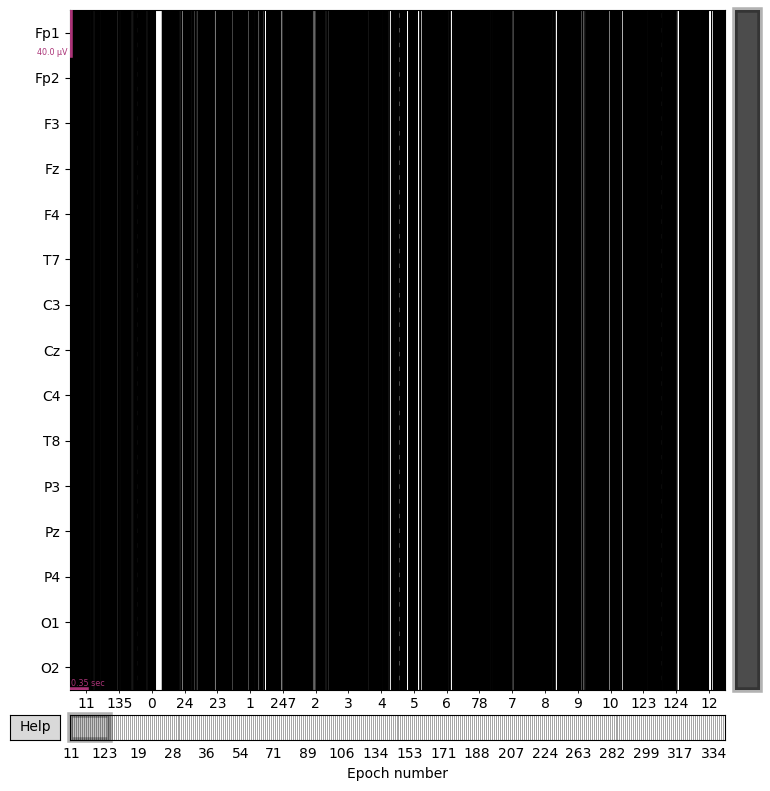

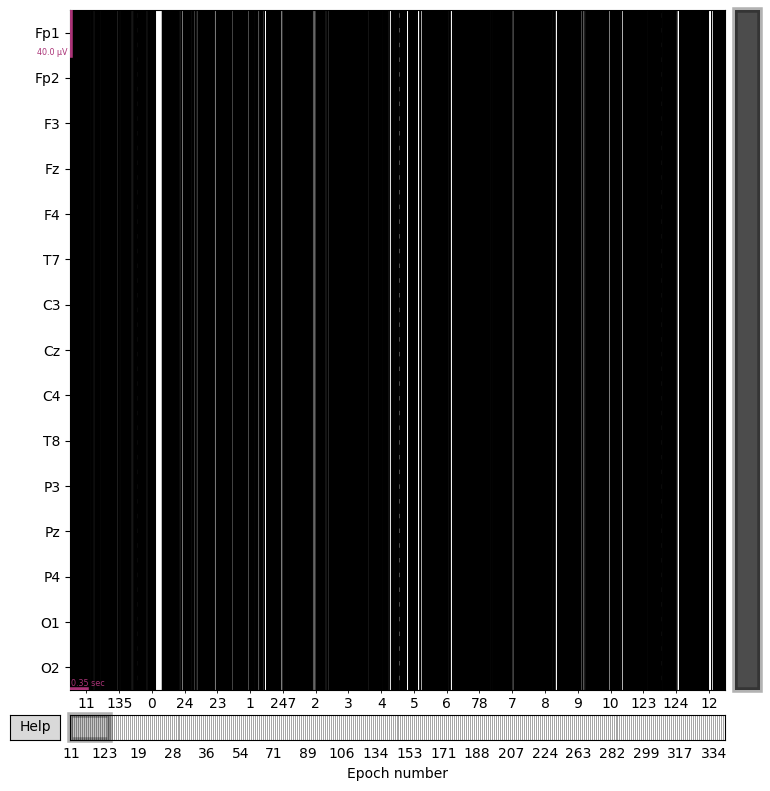

In [31]:
epoch_1.plot()

In [46]:
data=[epoch_1, epoch_2]
data

[<Epochs |  329 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~6.7 MB, data loaded,
  '1': 141
  '2': 182
  '12': 6>,
 <Epochs |  329 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~6.7 MB, data loaded,
  '1': 141
  '2': 182
  '12': 6>]

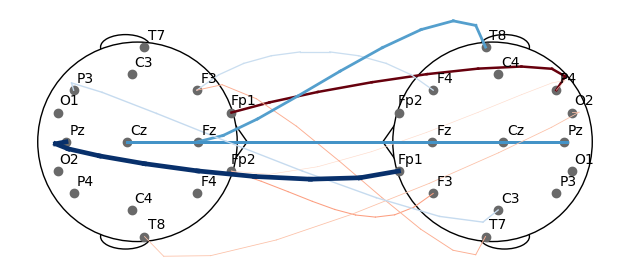

<Axes: >

In [50]:
from hypyp import viz
viz.viz_2D_topomap_inter(epoch_1, epoch_2, C, threshold=2, steps=10, lab=True)

In [234]:
# 

NameError: name 'epo1' is not defined

In [118]:
# viz.plot_significant_sensors(
#     T_obs_plot=statsCondTuple.T_obs, epochs=preproc_S1)

NameError: name 'statsCondTuple' is not defined